In [12]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load sample dataset
file_path = 'indiancrop_dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Split dataset into features and target
X = data.drop(columns=["CROP"])
y = data["CROP"]

In [4]:
# One-hot encode categorical features
X = pd.get_dummies(X, columns=["STATE"], drop_first=True)

In [5]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ["N_SOIL", "P_SOIL", "K_SOIL", "TEMPERATURE", "HUMIDITY", "ph", "RAINFALL"]
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [6]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [7]:
# Save the scaler and label encoder
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [10]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [13]:
# Define classifiers
classifiers = {
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
}

In [14]:
# Evaluate each classifier
results = {}
for name, model in classifiers.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

GradientBoosting Accuracy: 0.9977
RandomForest Accuracy: 1.0000
SVC Accuracy: 0.0818
KNN Accuracy: 0.3455


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


LogisticRegression Accuracy: 0.9795
XGBoost Accuracy: 1.0000
CatBoost Accuracy: 1.0000


In [15]:
# Print sorted results
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance:")
for name, accuracy in sorted_results:
    print(f"{name}: {accuracy:.4f}")


Model Performance:
RandomForest: 1.0000
XGBoost: 1.0000
CatBoost: 1.0000
GradientBoosting: 0.9977
LogisticRegression: 0.9795
KNN: 0.3455
SVC: 0.0818


/var/folders/8c/mmm2rfr176q_3ntfwjjh63b80000gn/T/ipykernel_20473/1419928476.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


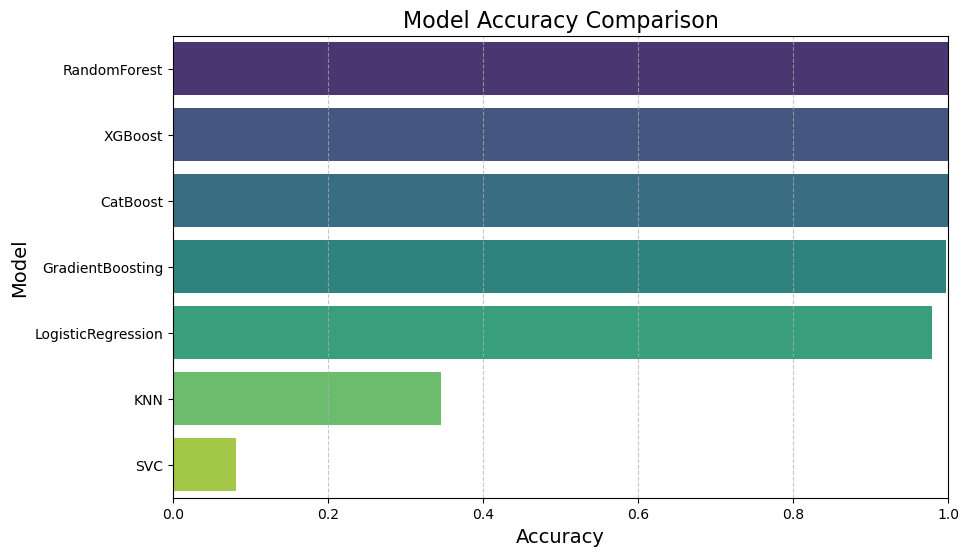

In [16]:
# Assuming `results` contains the model names as keys and accuracies as values
# Example: results = {"GradientBoosting": 0.85, "RandomForest": 0.88, "SVC": 0.83, ...}

# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Sort by accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.xlim(0, 1)  # Accuracy is between 0 and 1
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

/var/folders/8c/mmm2rfr176q_3ntfwjjh63b80000gn/T/ipykernel_20473/853848317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="coolwarm")


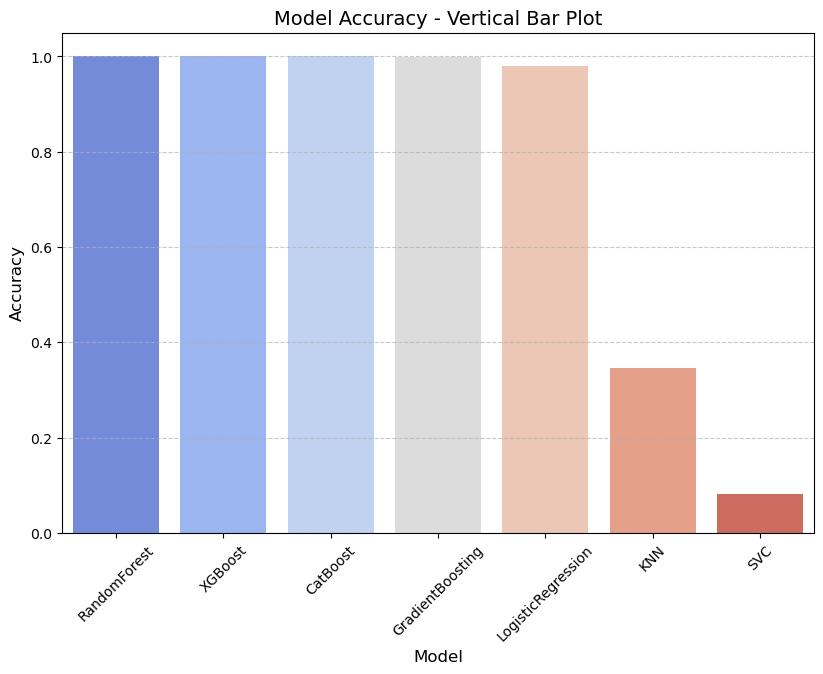

In [25]:
plt.figure(figsize=(16, 12))

# Bar Plot (Vertical)
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="coolwarm")
plt.title("Model Accuracy - Vertical Bar Plot", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

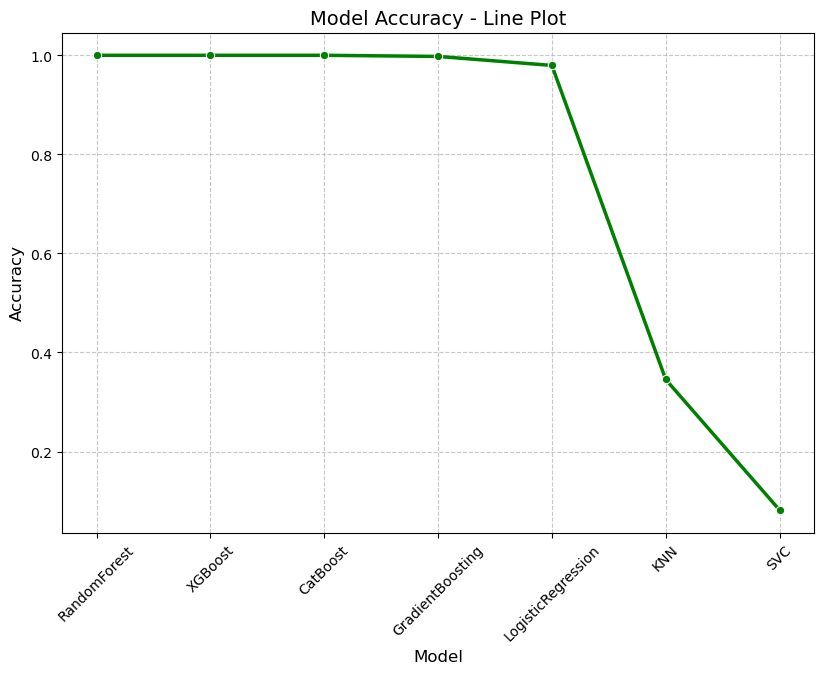

In [26]:
plt.figure(figsize=(16, 12))
# Line Plot
plt.subplot(2, 2, 3)
sns.lineplot(x="Model", y="Accuracy", data=results_df, marker="o", color="green", linewidth=2.5)
plt.title("Model Accuracy - Line Plot", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="both", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


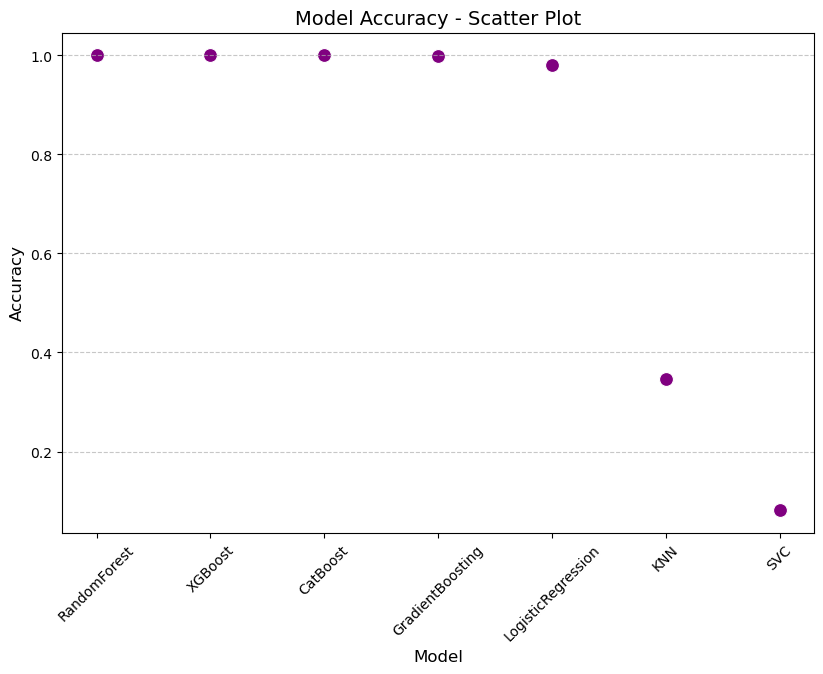

In [27]:
plt.figure(figsize=(16, 12))

# Scatter Plot
plt.subplot(2, 2, 4)
sns.scatterplot(x="Model", y="Accuracy", data=results_df, color="purple", s=100)
plt.title("Model Accuracy - Scatter Plot", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout and show all plots
plt.tight_layout()
plt.show()

In [28]:
model = GradientBoostingClassifier(random_state=42)

In [29]:
# Fit model
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [31]:
joblib.dump(model, "crop_model.pkl")
print("Model saved to crop_model.pkl")

Model saved to crop_model.pkl
